<a href="https://www.kaggle.com/code/fall2fire/zara-sales-forecasting-r2-score-0-94?scriptVersionId=282808463" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Libaries Required

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the Data

In [2]:
df=pd.read_csv('/kaggle/input/business-salesdataset2025/Business_sales_EDA.csv', sep=';')

In [3]:
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


In [4]:
df.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
name                1
description         2
price               0
currency            0
terms               0
section             0
season              0
material            0
origin              0
dtype: int64

In [5]:
df.shape

(20252, 17)

# EDA (Data Analysis)

Product Position
Aisle             7810
End-cap           6791
Front of Store    5651
Name: count, dtype: int64




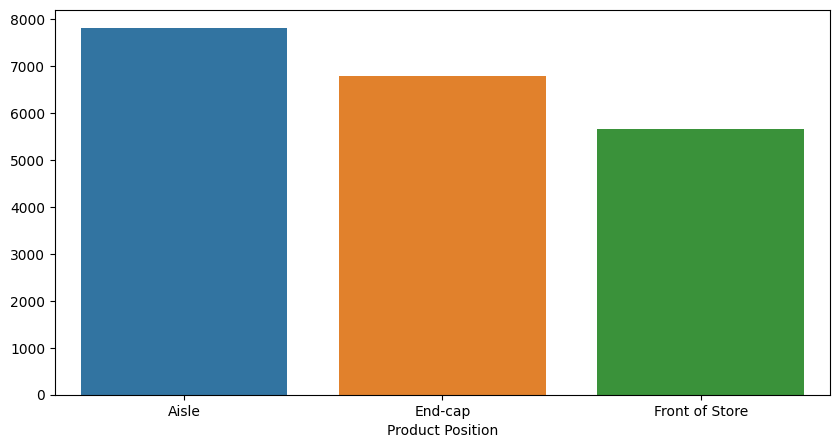

Promotion
No     11812
Yes     8440
Name: count, dtype: int64




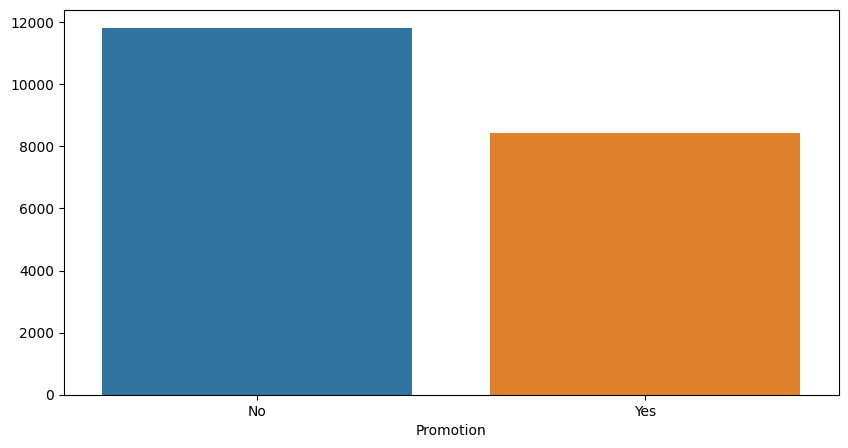

Product Category
clothing    20252
Name: count, dtype: int64




/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


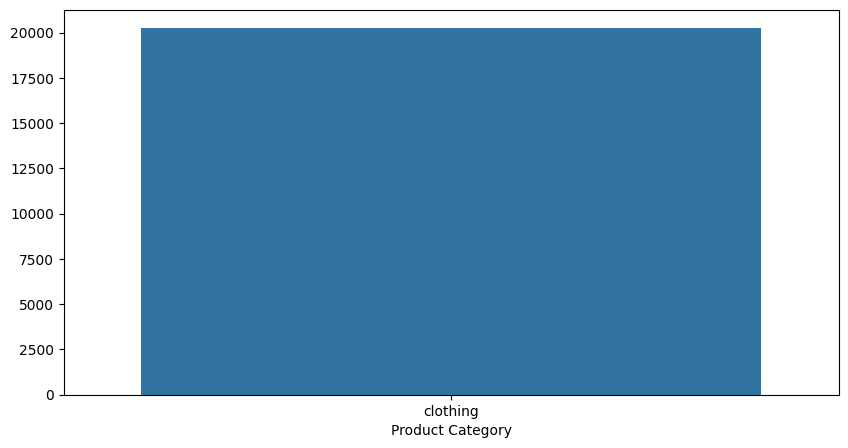

Seasonal
No     10136
Yes    10116
Name: count, dtype: int64




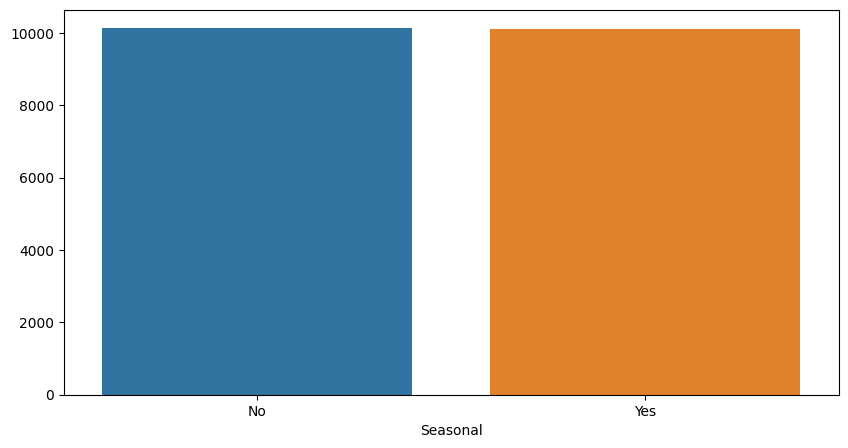

Sales Volume
848     60
829     59
864     54
867     54
838     54
        ..
1879     1
1740     1
1912     1
1782     1
599      1
Name: count, Length: 1284, dtype: int64




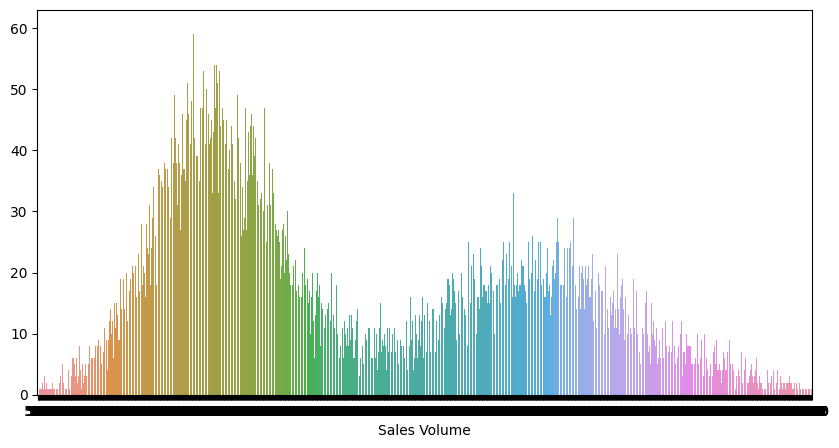

brand
Zara    20252
Name: count, dtype: int64




/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


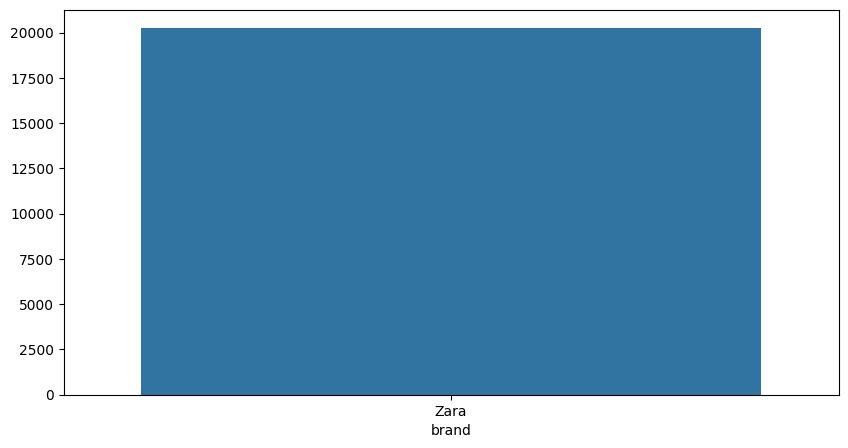

price
19.99     662
29.99     621
25.99     599
39.99     530
22.99     518
         ... 
102.00      1
92.00       1
91.00       1
112.99      1
101.95      1
Name: count, Length: 330, dtype: int64




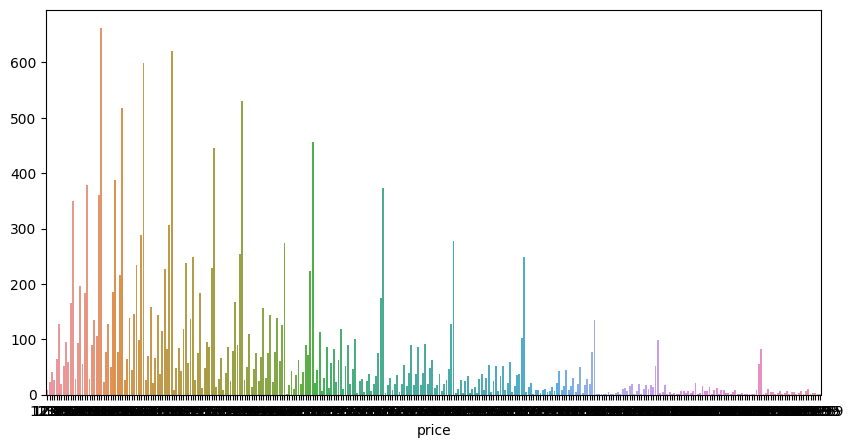

currency
USD    20252
Name: count, dtype: int64




/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


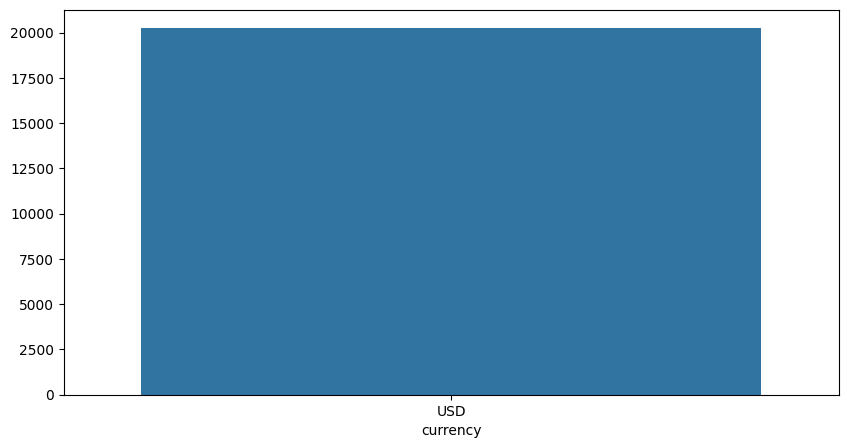

terms
jackets     11232
sweaters     3257
t-shirts     2646
shoes        2458
jeans         659
Name: count, dtype: int64




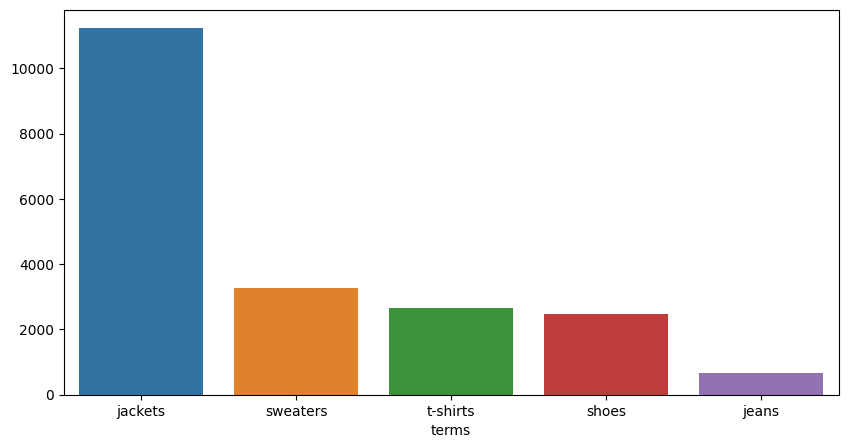

section
WOMAN    13254
MAN       6998
Name: count, dtype: int64




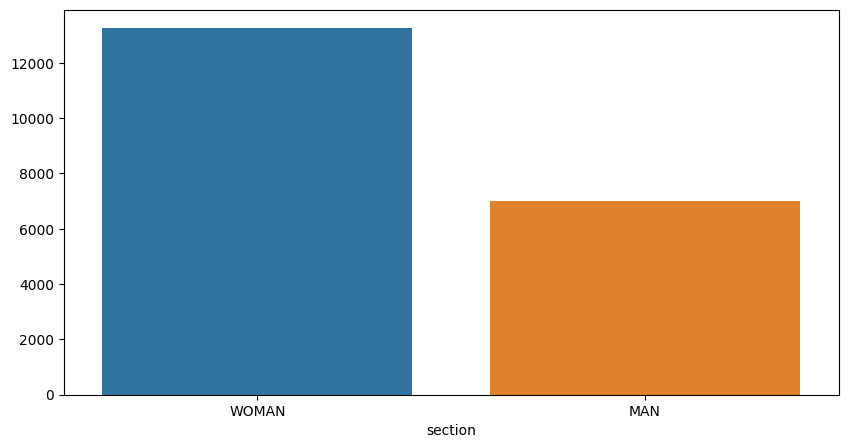

season
Autumn    7665
Winter    5144
Spring    4537
Summer    2906
Name: count, dtype: int64




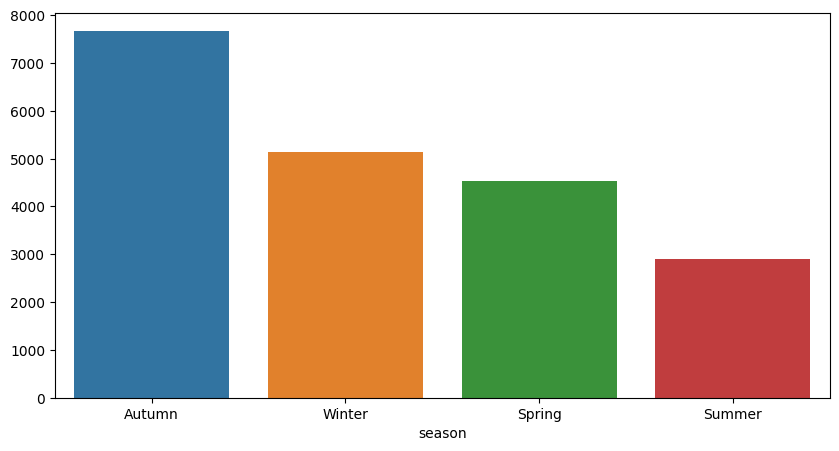

material
Cotton         3851
Wool           3805
Wool Blend     3373
Polyester      2775
Linen          2573
Denim          1027
Viscose         990
Acrylic         881
Linen Blend     807
Satin           132
Silk             38
Name: count, dtype: int64




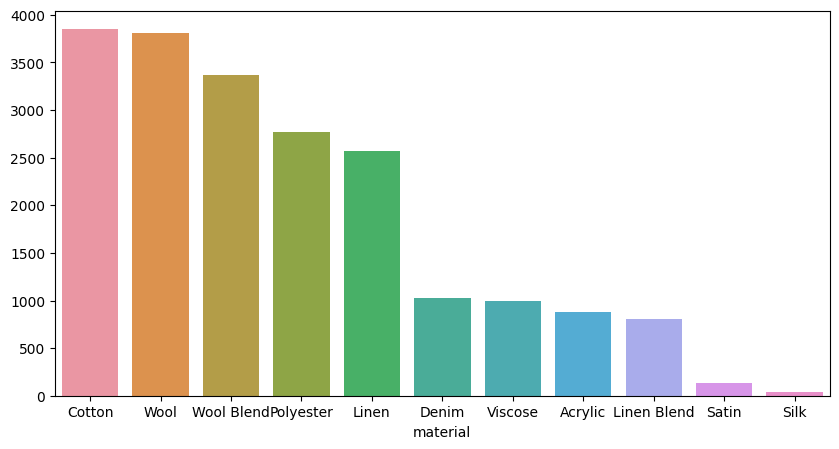

origin
China         4026
Bangladesh    3617
Turkey        2475
India         2033
Morocco       1653
Portugal      1420
Spain         1248
Vietnam       1220
Cambodia       981
Brazil         795
Pakistan       605
Argentina      179
Name: count, dtype: int64




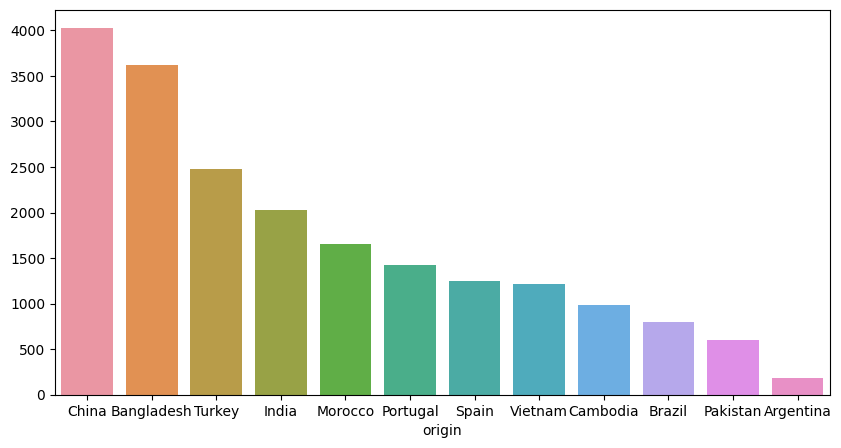

In [6]:
col=['Product Position','Promotion','Product Category','Seasonal','Sales Volume',
     'brand','price','currency','terms','section','season','material','origin']
for i in col:
    x=df[i].value_counts()
    print(x)
    print("\n")
    plt.figure(figsize=(10,5))
    sns.barplot(x=x.index,y=x.values)
    plt.show()

In [7]:
df.describe()

,Product ID,Sales Volume,price
count,20252.000000,20252.000000,20252.000000
mean,208931.432303,1097.400454,41.949061
std,8961.076507,298.234609,23.380960
min,110075.000000,518.000000,12.000000
25%,204442.750000,849.000000,23.950000
50%,209505.500000,990.000000,35.950000
75%,214568.250000,1364.250000,53.950000
max,219631.000000,1940.000000,134.990000


## Outlier Detection 

<Axes: >

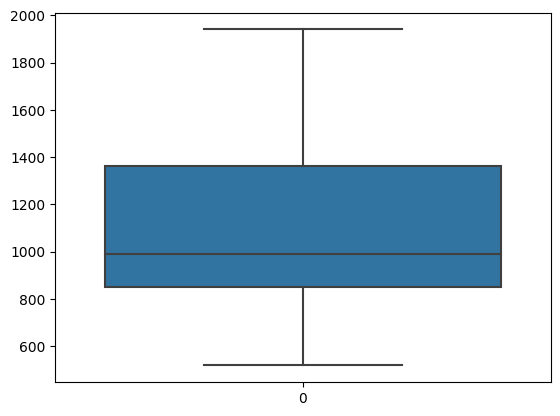

In [8]:
sns.boxplot(df['Sales Volume'])

<Axes: >

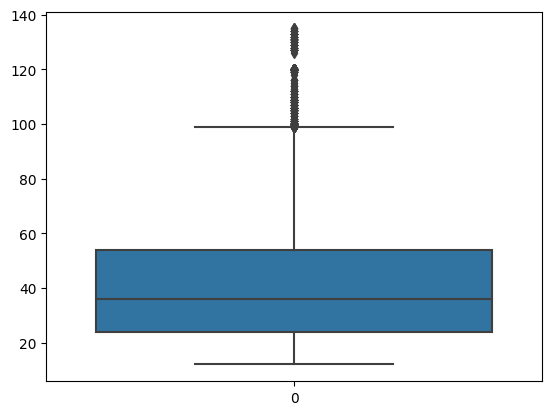

In [9]:
sns.boxplot(df['price'])

In [10]:
print("Max:",df['price'].max())
print("Min:",df['price'].min())
print("Mode:",df['price'].mode())
print("Mean:",df['price'].mean())
print("Median:",df['price'].median())

Max: 134.99
Min: 12.0
Mode: 0    19.99
Name: price, dtype: float64
Mean: 41.949060833497924
Median: 35.95


In [11]:
df.columns

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'name', 'description',
       'price', 'currency', 'terms', 'section', 'season', 'material',
       'origin'],
      dtype='object')

## Removing Unwanted Columns 

In [12]:
to_drop = ['Product ID','url','currency','brand','description','name','Product Category']
df.drop(columns=to_drop, inplace=True, errors='ignore')

## Binary Mapping

In [13]:
df['Promotion'] = df['Promotion'].map({'Yes':1,'No':0})
df['Seasonal']  = df['Seasonal'].map({'Yes':1,'No':0})
df['section']  = df['section'].map({'WOMAN':1,'MAN':0})

In [14]:
df.head(10)

,Product Position,Promotion,Seasonal,Sales Volume,price,terms,section,season,material,origin
0,Aisle,1,1,1243,78.99,jackets,0,Winter,Polyester,Brazil
1,Aisle,1,0,1429,14.99,jackets,0,Autumn,Cotton,Turkey
2,End-cap,1,1,1168,71.95,jackets,1,Autumn,Polyester,Morocco
3,Aisle,1,0,1348,30.99,jackets,0,Spring,Polyester,China
4,End-cap,1,1,1602,22.99,jackets,1,Winter,Wool Blend,China
5,End-cap,1,1,1282,25.95,jackets,1,Autumn,Cotton,Turkey
6,Front of Store,0,0,688,87.99,jackets,0,Winter,Acrylic,China
7,Aisle,1,1,1711,24.00,jackets,1,Summer,Cotton,Portugal
8,Aisle,0,1,857,32.95,jackets,1,Winter,Wool,India
9,Aisle,0,0,769,39.95,jackets,0,Autumn,Wool Blend,China


## Label Encoding 

In [15]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Product Position','terms','season','material','origin']

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(f"\n{col} mapping:")
    print(dict(zip(le.classes_, le.transform(le.classes_))))



Product Position mapping:
{'Aisle': 0, 'End-cap': 1, 'Front of Store': 2}

terms mapping:
{'jackets': 0, 'jeans': 1, 'shoes': 2, 'sweaters': 3, 't-shirts': 4}

season mapping:
{'Autumn': 0, 'Spring': 1, 'Summer': 2, 'Winter': 3}

material mapping:
{'Acrylic': 0, 'Cotton': 1, 'Denim': 2, 'Linen': 3, 'Linen Blend': 4, 'Polyester': 5, 'Satin': 6, 'Silk': 7, 'Viscose': 8, 'Wool': 9, 'Wool Blend': 10}

origin mapping:
{'Argentina': 0, 'Bangladesh': 1, 'Brazil': 2, 'Cambodia': 3, 'China': 4, 'India': 5, 'Morocco': 6, 'Pakistan': 7, 'Portugal': 8, 'Spain': 9, 'Turkey': 10, 'Vietnam': 11}


In [16]:
df.head()

,Product Position,Promotion,Seasonal,Sales Volume,price,terms,section,season,material,origin
0,0,1,1,1243,78.99,0,0,3,5,2
1,0,1,0,1429,14.99,0,0,0,1,10
2,1,1,1,1168,71.95,0,1,0,5,6
3,0,1,0,1348,30.99,0,0,1,5,4
4,1,1,1,1602,22.99,0,1,3,10,4


## Correlation Matrix

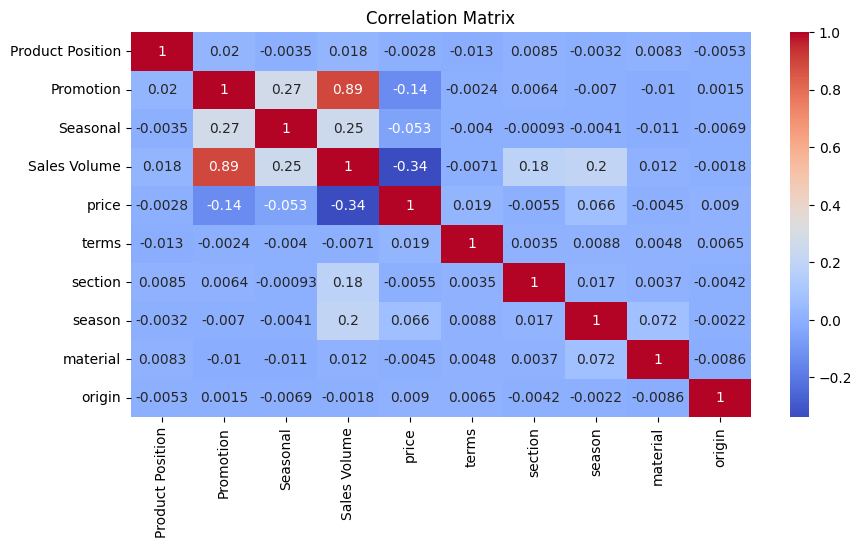

In [17]:
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Observation
### Target **Sales Volume** is Highly correlated with **promotion** and slightly with **Seasonal,section,season**.
### This means Sales is directly dependent on these factors especially promotion. 

# Model Building (CatBoostRegressor)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor

features = ['Product Position','Promotion','Seasonal','price',
            'terms','section','season','material','origin']

X = df[features]
y = df['Sales Volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost model
reg_model = CatBoostRegressor(
    iterations=1200,
    learning_rate=0.03,
    depth=8,
    loss_function='RMSE',
    random_seed=42,
    verbose=False
)

reg_model.fit(X_train, y_train, cat_features=[0,1,2,4,5,6,7,8])
y_pred = reg_model.predict(X_test)

# Metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = (abs((y_test - y_pred) / y_test).mean())*100
r2 = r2_score(y_test, y_pred)

print("Regression Results:")
print("R²:", r2)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


Regression Results:
R²: 0.9355849954486917
RMSE: 75.23130203023631
MAE: 58.989084769280225
MAPE: 5.416792803805388


# Model Evaluation

Text(0.5, 1.0, 'Actual vs Predicted')

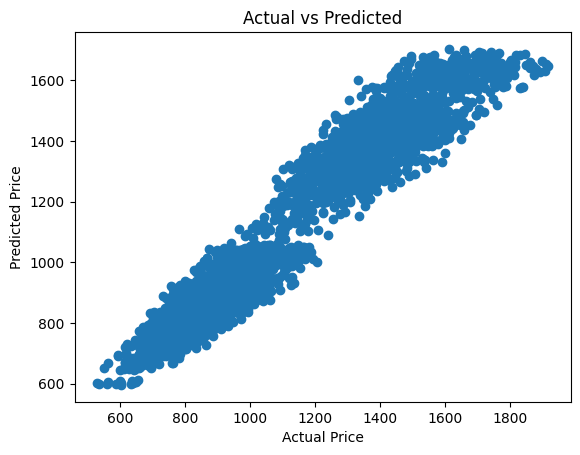

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


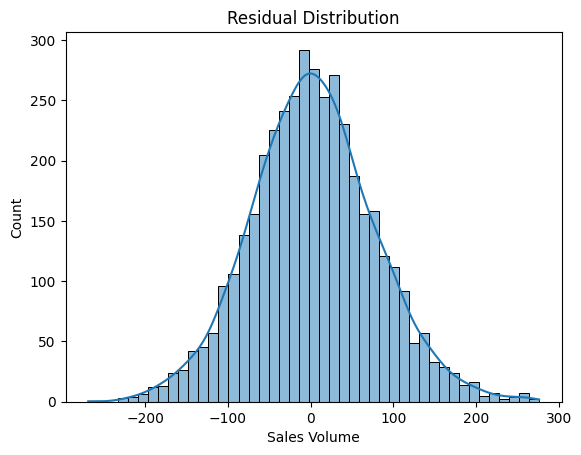

In [20]:
errors = y_test - y_pred
sns.histplot(errors, kde=True)
plt.title("Residual Distribution")
plt.show()

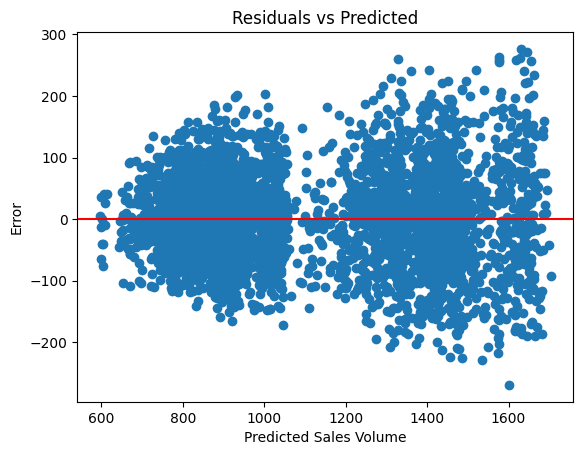

In [21]:
plt.scatter(y_pred, errors)
plt.axhline(0, color='red')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Sales Volume")
plt.ylabel("Error")
plt.show()


In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg_model, X, y, cv=5, scoring='r2')
print("Cross-Validation R²:", scores.mean())
smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred))) * 100
print("SMAPE:", smape)


Cross-Validation R²: 0.9353707819472186
SMAPE: 5.410998648196296


## Results
### R²: 0.9355849954486917
### RMSE: 75.23130203023631
### MAE: 58.989084769280225
### MAPE: 5.416792803805388
### Cross-Validation R²: 0.9353707819472186
### SMAPE: 5.410998648196296

### These results are suffient to use this model in real life scenario....

In [23]:
reg_model.save_model("sales_volume_model.cbm")

# Regression Plot

Text(0, 0.5, 'Predicted Price')

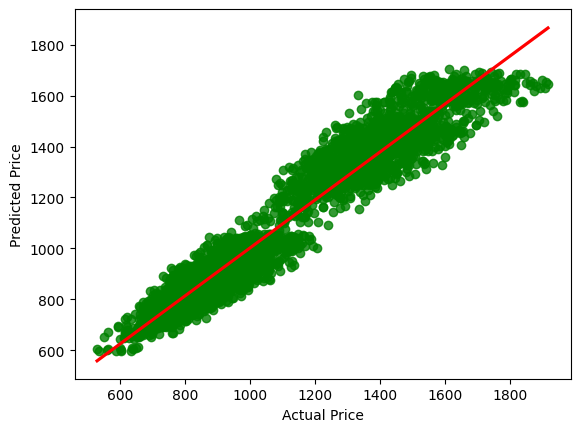

In [24]:
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")